In [2]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [3]:
df = pd.read_csv(r"C:\Users\singh\Downloads\Updated_file_v1.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,AGE,AWEEKEND,AMONTH,DIED,DRG,ELECTIVE,FEMALE,HCUP_ED,HOSP_DIVISION_x,HOSP_NIS_x,KEY_NIS,LOS,PAY1,RACE,TOTCHG,YEAR,ZIPINC_QRTL,APRDRG,APRDRG_Risk_Mortality,APRDRG_Severity,HOSP_BEDSIZE,HOSP_LOCTEACH,HOSP_REGION,H_CONTRL,Acute_rheumatic_fever,Chronic_rheumatic_heart_diseases,Hypertensive_diseases,Ischemic_heart_diseases,Pulmonary_heart_diseases,Other_heart_diseases
0,87.0,1,6.0,0,391,0,1,2,1,10001,10002081,2,1,1,12425,2016,4.0,244.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,66.0,0,7.0,0,638,0,0,2,1,10001,10003421,4,1,1,19189,2016,3.0,420.0,2.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,83.0,0,4.0,0,291,0,0,2,1,10001,10003995,5,1,1,21433,2016,3.0,194.0,3.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
3,58.0,0,2.0,0,623,0,0,2,1,10001,10004372,4,2,2,25219,2016,1.0,380.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62.0,0,1.0,0,291,0,0,2,1,10001,10004529,1,1,1,9060,2016,3.0,194.0,3.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}\n")

Column 'AGE': [87. 66. 83. 58. 62. 90. 79. 81. 72. 69. 71. 75. 73. 80. 85. 70. 86. 65.
 68. 55. 52. 61. 89. 78. 57. 67. 60. 39. 38. 48. 84. 88. 59. 82. 41. 34.
 56. 64. 76. 53. 50. 43. 77. 44. 42. 51. 63. 25. 74. 49. 22. 28. 45. 54.
 27. 47. 36. 32. 31. 46. 35. 40. 33. 18. 30. 26. 24. 29. 37. 19. 20. 21.
 23.]

Column 'AWEEKEND': [1 0]

Column 'AMONTH': [ 6.  7.  4.  2.  1.  5.  9. 12. 10. 11.  3.  8.]

Column 'DIED': [0 1]

Column 'DRG': [391 638 291 623 292 602 308 389 310 282 208 854 581 384 871 988 392 202
 690 603 908 999 189 388 885 176 243 856  38 293  60 565 853 195 870 439
 336 309 982 470 897 621 191 100 253 689 699 563 808 641 377 299 194 378
  65 281 329 264 713 917 175 193 682 242 572 554 178 809  69 283 442 864
 417 637 438  64 383 644 640 444 177 390 617 313 156 393 315 605 166 683
 330 190 894 535 149 394 639 684 872 616 592 205  66 501  71 543 244 441
 987 604 312 812 296 280 483 386 467 371 192  91  73 357 303 207 481 302
 101 316 200 698 562 823 252 186 479 881 668 3

In [6]:
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096311 entries, 0 to 8096310
Data columns (total 30 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   AGE                               float64
 1   AWEEKEND                          int64  
 2   AMONTH                            float64
 3   DIED                              int64  
 4   DRG                               int64  
 5   ELECTIVE                          int64  
 6   FEMALE                            int64  
 7   HCUP_ED                           int64  
 8   HOSP_DIVISION_x                   int64  
 9   HOSP_NIS_x                        int64  
 10  KEY_NIS                           int64  
 11  LOS                               int64  
 12  PAY1                              int64  
 13  RACE                              int64  
 14  TOTCHG                            int64  
 15  YEAR                              int64  
 16  ZIPINC_QRTL                       fl

Other_heart_diseases                1
Pulmonary_heart_diseases            1
Ischemic_heart_diseases             1
Hypertensive_diseases               1
Chronic_rheumatic_heart_diseases    1
Acute_rheumatic_fever               1
H_CONTRL                            1
HOSP_REGION                         1
HOSP_LOCTEACH                       1
HOSP_BEDSIZE                        1
APRDRG_Severity                     1
APRDRG_Risk_Mortality               1
APRDRG                              1
ZIPINC_QRTL                         1
AWEEKEND                            0
AGE                                 0
TOTCHG                              0
RACE                                0
PAY1                                0
LOS                                 0
KEY_NIS                             0
HOSP_NIS_x                          0
HOSP_DIVISION_x                     0
HCUP_ED                             0
FEMALE                              0
ELECTIVE                            0
DRG         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,8096311.0,7.038355e+01,1.421499e+01,18.0,62.0,72.0,82.0,90.0
AWEEKEND,8096311.0,2.192863e-01,4.137630e-01,0.0,0.0,0.0,0.0,1.0
AMONTH,8096311.0,6.449239e+00,3.481651e+00,1.0,3.0,6.0,10.0,12.0
DIED,8096311.0,4.137526e-02,1.991566e-01,0.0,0.0,0.0,0.0,1.0
DRG,8096311.0,4.194870e+02,2.586409e+02,1.0,242.0,309.0,638.0,999.0
ELECTIVE,8096311.0,1.374173e-01,3.442874e-01,0.0,0.0,0.0,0.0,1.0
FEMALE,8096311.0,4.787515e-01,4.995483e-01,0.0,0.0,0.0,1.0,1.0
HCUP_ED,8096311.0,9.668606e-01,7.957452e-01,0.0,0.0,1.0,1.0,4.0
HOSP_DIVISION_x,8096311.0,4.540700e+00,2.369788e+00,1.0,3.0,5.0,6.0,9.0
HOSP_NIS_x,8096311.0,4.569706e+04,2.371961e+04,10001.0,30054.0,50018.0,60274.0,90538.0


C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


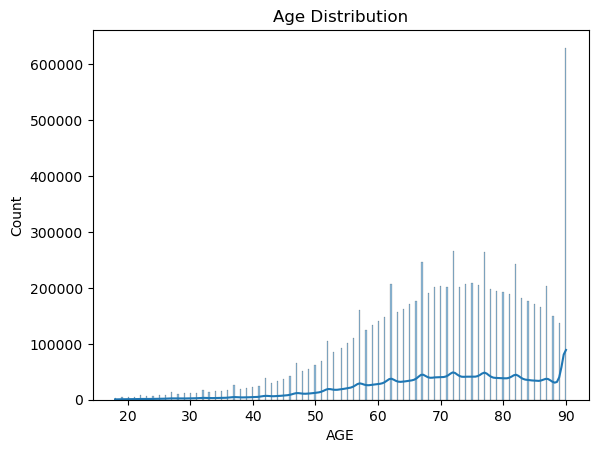

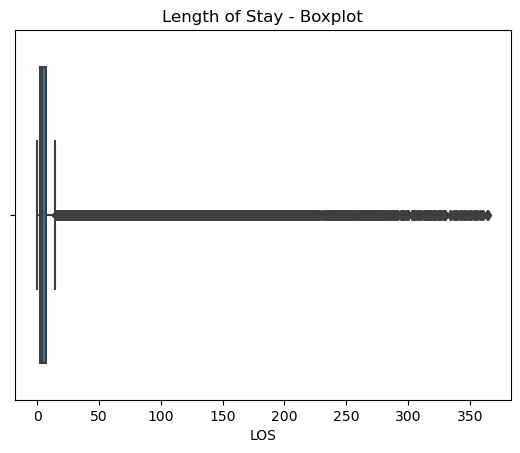

In [8]:
# Age Distribution
sns.histplot(df['AGE'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# LOS (Length of Stay)
sns.boxplot(x=df['LOS'])
plt.title("Length of Stay - Boxplot")
plt.show()


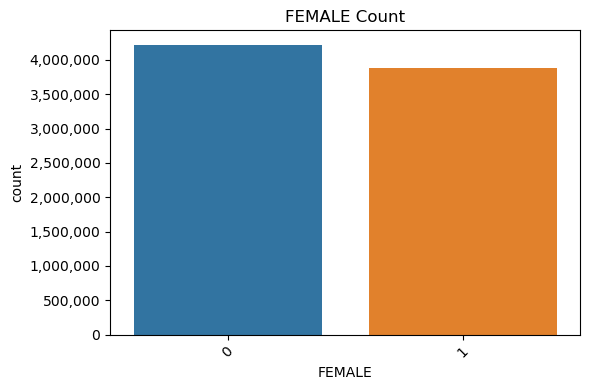

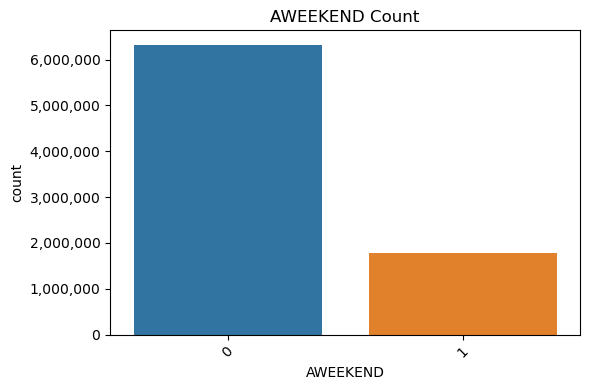

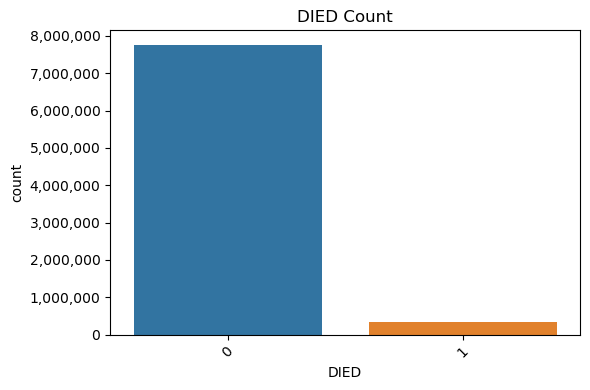

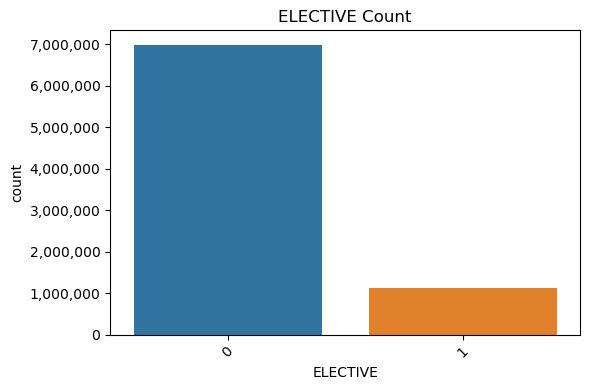

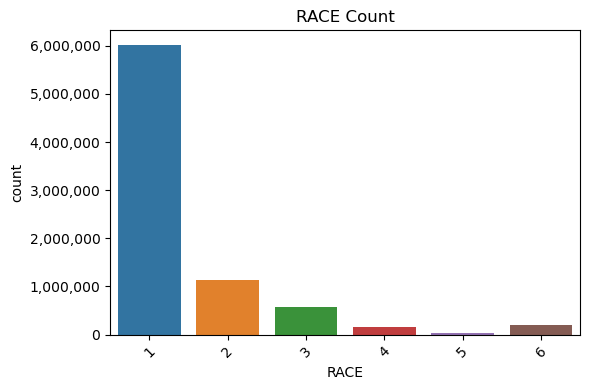

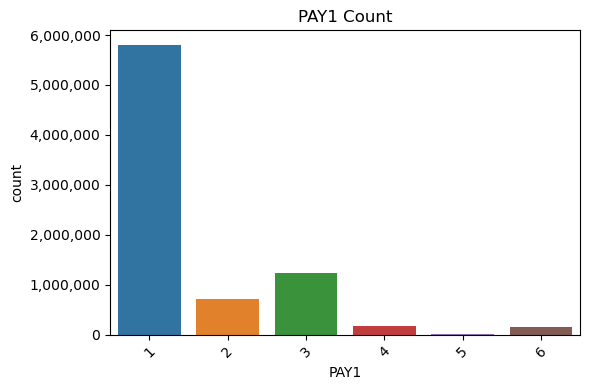

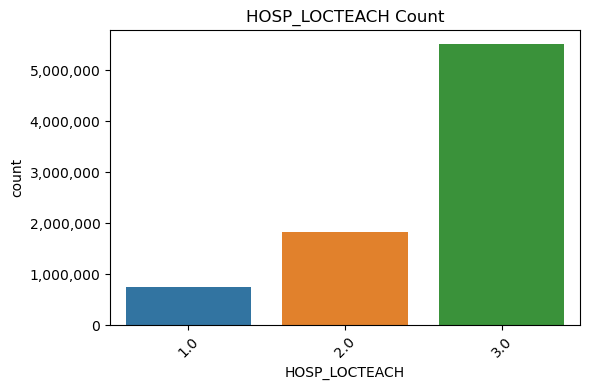

In [9]:
# Formatter function to show large numbers with commas
def format_with_commas(x, pos):
    return f'{int(x):,}'

categorical_vars = ['FEMALE', 'AWEEKEND', 'DIED', 'ELECTIVE', 
                    'RACE', 'PAY1', 'HOSP_LOCTEACH']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var, data=df)
    ax.set_title(f"{var} Count")
    
    # Set y-axis to show full integer with commas
    ax.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


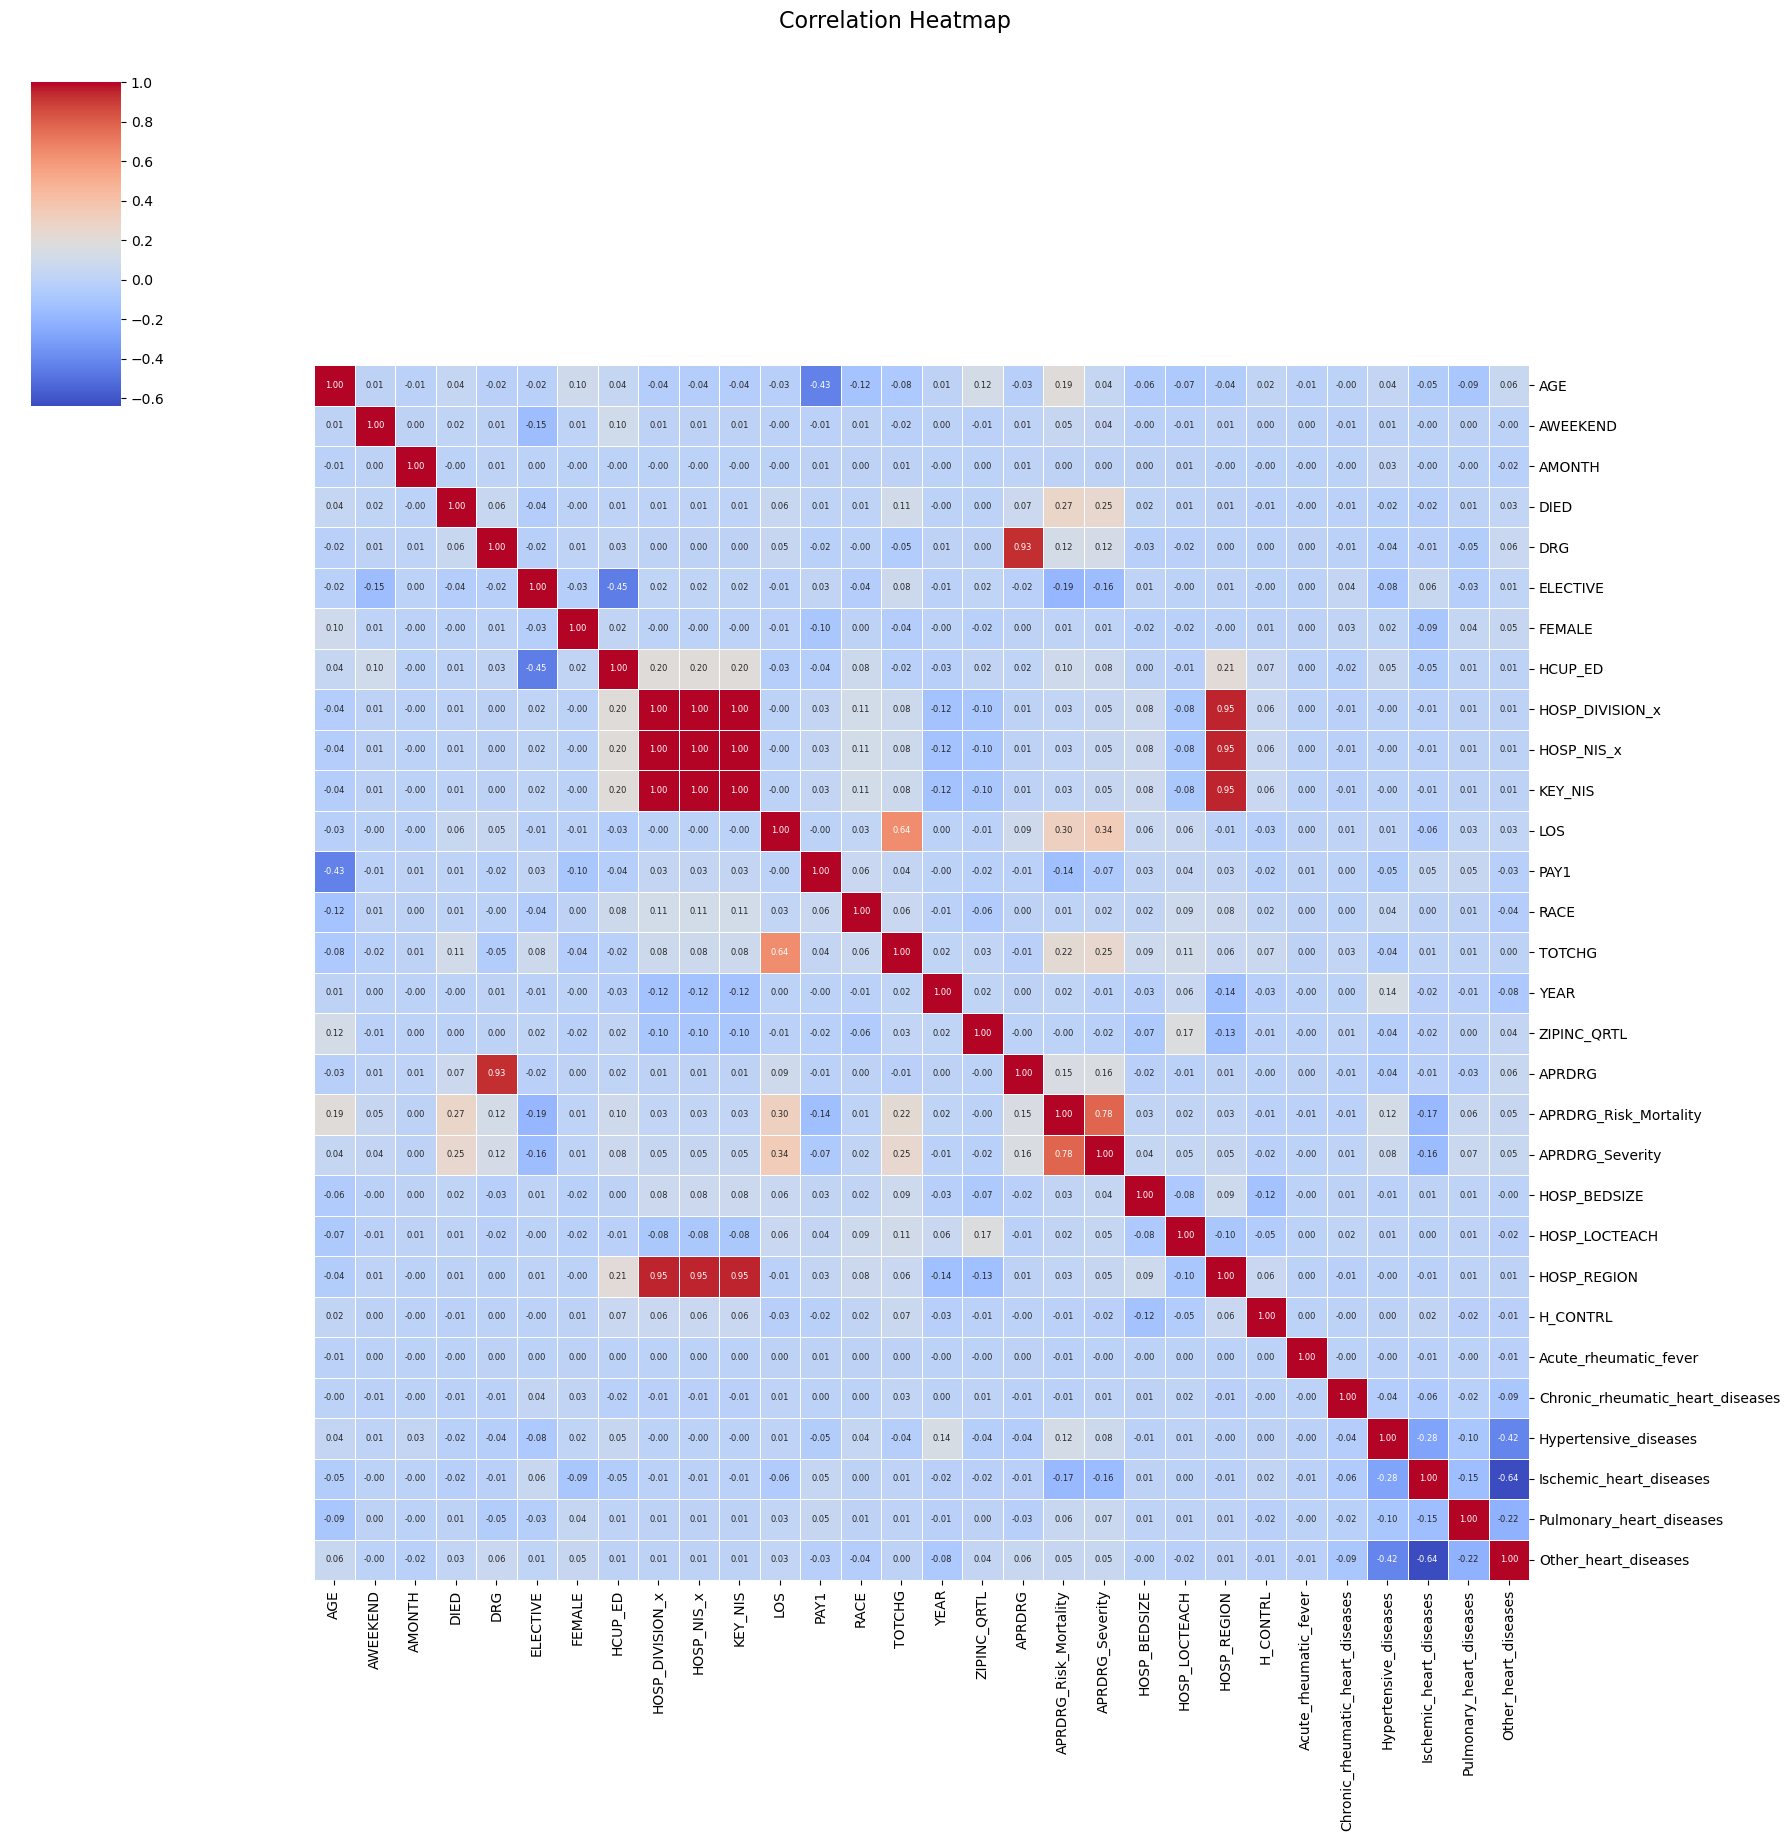

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr()

sns.clustermap(
    corr,
    cmap="coolwarm",
    figsize=(18, 18),
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 6},
    row_cluster=False,      # Turn off left-side dendrogram
    col_cluster=False       # Turn off top dendrogram
)

plt.suptitle("Correlation Heatmap", fontsize=16, y=1.02)
plt.show()


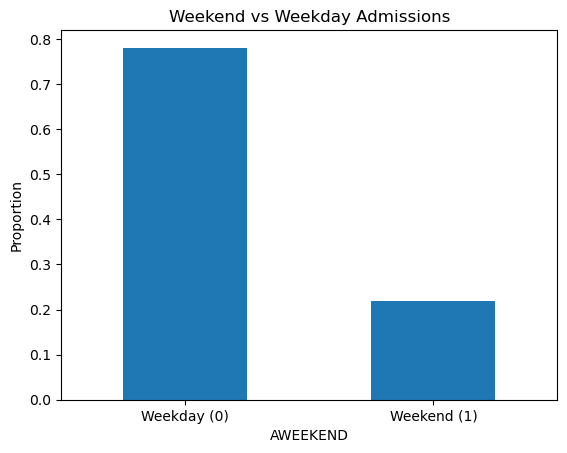

In [11]:
df['AWEEKEND'].value_counts(normalize=True).plot(kind='bar')
plt.title('Weekend vs Weekday Admissions')
plt.xticks([0, 1], ['Weekday (0)', 'Weekend (1)'], rotation=0)
plt.ylabel('Proportion')
plt.show()


In [12]:
df.dropna(inplace=True)

In [13]:
# --- Create derived columns ---
df['Teaching_Hospital'] = df['HOSP_LOCTEACH'].astype(int).apply(lambda x: 1 if x == 3 else 0)
df['Weekend_Admission'] = df['AWEEKEND']

In [14]:
categorical_vars = [
    'FEMALE', 'RACE', 'PAY1', 'DIED', 'ELECTIVE',
    'Acute_rheumatic_fever', 'Chronic_rheumatic_heart_diseases',
    'Hypertensive_diseases', 'Ischemic_heart_diseases',
    'Pulmonary_heart_diseases', 'Other_heart_diseases'
]

In [15]:
continuous_vars = [
    'AGE', 'LOS', 'TOTCHG',
    'APRDRG_Risk_Mortality', 'APRDRG_Severity'
]

In [16]:
def summarize_group(df, group_col, label):
    print(f"\n{'='*30}\nDescriptive Stats: {label}\n{'='*30}")
    
    # --- Continuous variables ---
    for var in continuous_vars:
        print(f"\n{var} Summary:")
        summary = df.groupby(group_col)[var].agg(['mean', 'std', 'count'])
        print(summary)

        group_vals = [group[var].dropna() for _, group in df.groupby(group_col)]
        if len(group_vals) == 2:
            stat, pval = ttest_ind(*group_vals, equal_var=False)
            print(f"t-test p-value for {var}: {pval:.4e}")

    # --- Categorical variables ---
    for var in categorical_vars:
        print(f"\n{var} Crosstab:")
        table = pd.crosstab(df[var], df[group_col])
        print(table)

        if table.shape[0] > 1:
            chi2, pval, _, _ = chi2_contingency(table)
            print(f"Chi-square p-value for {var}: {pval:.4e}")

In [17]:
# --- Run comparisons ---
summarize_group(df, 'Weekend_Admission', 'Weekend vs Weekday Admission')
summarize_group(df, 'Teaching_Hospital', 'Teaching vs Non-Teaching Hospitals')


Descriptive Stats: Weekend vs Weekday Admission

AGE Summary:
                        mean        std    count
Weekend_Admission                               
0                  70.323607  14.099256  6320901
1                  70.596959  14.617615  1775409
t-test p-value for AGE: 4.7658e-109

LOS Summary:
                       mean       std    count
Weekend_Admission                             
0                  5.604268  6.886278  6320901
1                  5.537657  6.742089  1775409
t-test p-value for LOS: 5.3936e-31

TOTCHG Summary:
                           mean            std    count
Weekend_Admission                                      
0                  68376.554882  108742.934176  6320901
1                  63511.048445  105278.845039  1775409
t-test p-value for TOTCHG: 0.0000e+00

APRDRG_Risk_Mortality Summary:
                       mean       std    count
Weekend_Admission                             
0                  2.475601  0.949559  6320901
1               

Teaching_Hospital           0        1
Other_heart_diseases                  
0.0                   1298205  2847833
1.0                   1287008  2663264
Chi-square p-value for Other_heart_diseases: 0.0000e+00


In [18]:
# Teaching status breakdown
teaching_mortality = pd.crosstab(df['Teaching_Hospital'], df['DIED'], normalize='index') * 100
print("\nMortality by Teaching Status (%):\n", teaching_mortality)


Mortality by Teaching Status (%):
 DIED                       0         1
Teaching_Hospital                     
0                  96.248820  3.751180
1                  95.681241  4.318759


In [19]:
# Weekend admission breakdown
weekend_mortality = pd.crosstab(df['Weekend_Admission'], df['DIED'], normalize='index') * 100
print("\nMortality by Weekend Admission (%):\n", weekend_mortality)


Mortality by Weekend Admission (%):
 DIED                       0         1
Weekend_Admission                     
0                  96.024712  3.975288
1                  95.284861  4.715139


In [20]:
# Teaching status vs mortality
chi2_teach, p_teach, _, _ = chi2_contingency(pd.crosstab(df['Teaching_Hospital'], df['DIED']))
print(f"Chi-square p-value (Teaching vs Mortality): {p_teach:.4e}")

# Weekend vs mortality
chi2_weekend, p_weekend, _, _ = chi2_contingency(pd.crosstab(df['Weekend_Admission'], df['DIED']))
print(f"Chi-square p-value (Weekend vs Mortality): {p_weekend:.4e}")


Chi-square p-value (Teaching vs Mortality): 0.0000e+00
Chi-square p-value (Weekend vs Mortality): 0.0000e+00


| Variable                              | Mortality % (DIED = 1)     | Notes                                |
|---------------------------------------|----------------------------|--------------------------------------|
| Teaching Hospital<br>(Urban Teaching vs Others) | 4.32% vs 3.75%             | Higher in teaching hospitals         |
| Weekend Admission                     | 4.72% vs 3.98%             | Higher on weekends                   |
| Chi-square tests                      | Both p < 0.0001            | Statistically significant differences|

In [21]:
# Create interaction term
df['Weekend_Teaching_Interaction'] = df['Weekend_Admission'] * df['Teaching_Hospital']

In [22]:
# Define model formula
formula = """
DIED ~ Weekend_Admission + Teaching_Hospital + Weekend_Teaching_Interaction +
        AGE + FEMALE + LOS + APRDRG_Severity + APRDRG_Risk_Mortality + RACE + PAY1
"""

In [23]:
# Fit logistic regression model
model = smf.logit(formula=formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.125271
         Iterations 9


In [24]:
# Display model summary
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                   DIED   No. Observations:              8096310
Model:                          Logit   Df Residuals:                  8096299
Method:                           MLE   Df Model:                           10
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.2729
Time:                        10:45:33   Log-Likelihood:            -1.0142e+06
converged:                       True   LL-Null:                   -1.3949e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -12.3021      0.020   -619.456      0.000     -12.341     -12.263
Weekend_Admission                0.0047      0.008      0.582      0.560     

In [25]:
odds_ratios = np.exp(model.params)
print("\nOdds Ratios:\n", odds_ratios)


Odds Ratios:
 Intercept                       0.000005
Weekend_Admission               1.004742
Teaching_Hospital               1.074220
Weekend_Teaching_Interaction    1.023344
AGE                             1.014337
FEMALE                          0.979707
LOS                             0.964427
APRDRG_Severity                 2.634820
APRDRG_Risk_Mortality           4.549746
RACE                            1.033734
PAY1                            1.206872
dtype: float64


| Predictor               | Coef (log-odds) | OR (Odds Ratio) | p-value   | Interpretation                                                                 |
|-------------------------|-----------------|-----------------|-----------|-------------------------------------------------------------------------------|
| Weekend Admission       | +0.0047         | 1.00            | 0.560     | Not significant after adjustment                                             |
| Teaching Hospital       | +0.0716         | 1.07            | <0.001    | Slightly increased odds                                                      |
| Interaction Term        | +0.0231         | 1.02            | 0.017     | Weak but significant interaction: the "weekend effect" varies by teaching status |
| APRDRG Severity         | +0.9688         | 2.63            | <0.001    | Strong predictor                                                             |
| APRDRG Risk Mortality   | +1.5151         | 4.55            | <0.001    | Most predictive                                                              |
| LOS                     | -0.0362         | 0.96            | <0.001    | Each extra day slightly reduces odds — possibly because more severe cases die early |

**Insight:**  
The weekend effect on mortality disappears after adjusting for severity and comorbidities — except when it's in a teaching hospital, where it's still slightly but significantly present.

**Interpretation of the Interaction:**  
*The effect of being admitted on the weekend depends on whether the hospital is teaching or not.*  

In other words, weekend admissions in teaching hospitals are more risky than in non-teaching ones — but the effect is modest.

In [26]:
# Predicted probabilities of death
df['pred_prob'] = model.predict()

# Convert to binary predictions (threshold = 0.5 by default)
df['predicted_died'] = (df['pred_prob'] >= 0.5).astype(int)



Accuracy: 0.9587
AUC: 0.8856

Confusion Matrix:
 [[7760886     437]
 [ 334222     765]]


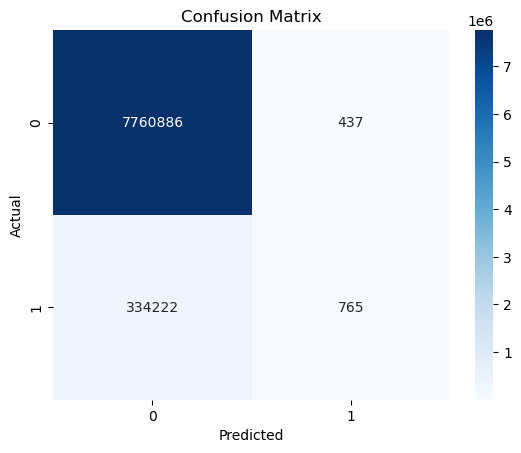

In [27]:
# Confusion matrix
cm = confusion_matrix(df['DIED'], df['predicted_died'])
acc = accuracy_score(df['DIED'], df['predicted_died'])
auc = roc_auc_score(df['DIED'], df['pred_prob'])

print(f"\nAccuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:\n", cm)

# Optional: nicer visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


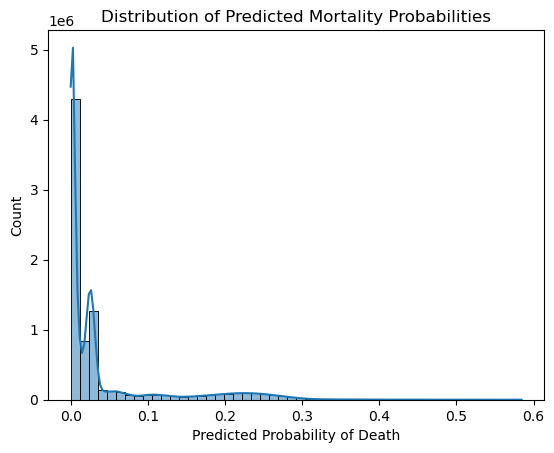

In [28]:
sns.histplot(df['pred_prob'], bins=50, kde=True)
plt.title("Distribution of Predicted Mortality Probabilities")
plt.xlabel("Predicted Probability of Death")
plt.show()

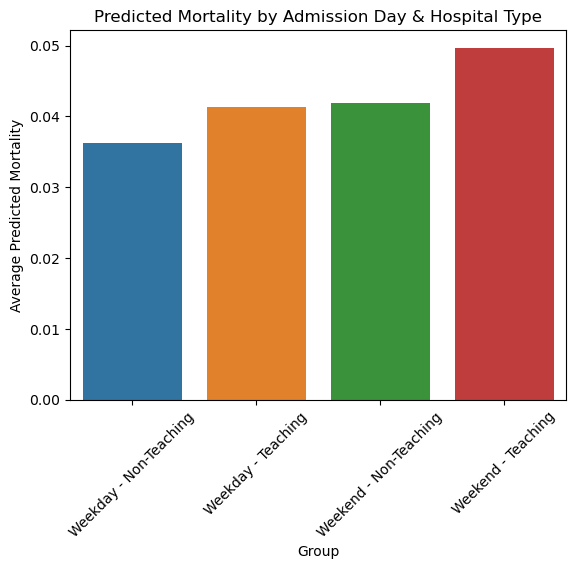

In [29]:
plot_df = df.groupby(['Weekend_Admission', 'Teaching_Hospital'])['pred_prob'].mean().reset_index()

# Add labels for clarity
plot_df['Group'] = plot_df.apply(lambda row: f"{'Weekend' if row['Weekend_Admission'] == 1 else 'Weekday'} - {'Teaching' if row['Teaching_Hospital'] == 1 else 'Non-Teaching'}", axis=1)

# Plot
sns.barplot(x='Group', y='pred_prob', data=plot_df)
plt.ylabel("Average Predicted Mortality")
plt.title("Predicted Mortality by Admission Day & Hospital Type")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Define DRG code lists
pci_drgs = [246, 247, 248, 249, 250]
cabg_drgs = [231, 232, 233, 234, 235]
thrombolytic_drgs = [280, 281, 282, 283, 284]

# Create flags
df['PCI_flag'] = df['DRG'].isin(pci_drgs).astype(int)
df['CABG_flag'] = df['DRG'].isin(cabg_drgs).astype(int)
df['Thrombolytic_flag'] = df['DRG'].isin(thrombolytic_drgs).astype(int)

# Check distribution
print("\nProcedure Counts:")
print("PCI:", df['PCI_flag'].sum())
print("CABG:", df['CABG_flag'].sum())
print("Thrombolytic:", df['Thrombolytic_flag'].sum())



Procedure Counts:
PCI: 273762
CABG: 69542
Thrombolytic: 243946


In [31]:
procedure_flags = ['PCI_flag', 'CABG_flag', 'Thrombolytic_flag']

for proc in procedure_flags:
    print(f"\nProcedure Usage Rate: {proc}")
    ctab = pd.crosstab([df['Teaching_Hospital'], df['Weekend_Admission']], df[proc], normalize='index') * 100
    print(ctab)



Procedure Usage Rate: PCI_flag
PCI_flag                                     0         1
Teaching_Hospital Weekend_Admission                     
0                 0                  97.187402  2.812598
                  1                  96.821228  3.178772
1                 0                  96.479600  3.520400
                  1                  96.068512  3.931488

Procedure Usage Rate: CABG_flag
CABG_flag                                    0         1
Teaching_Hospital Weekend_Admission                     
0                 0                  99.425049  0.574951
                  1                  99.620455  0.379545
1                 0                  98.901789  1.098211
                  1                  99.296065  0.703935

Procedure Usage Rate: Thrombolytic_flag
Thrombolytic_flag                            0         1
Teaching_Hospital Weekend_Admission                     
0                 0                  96.881493  3.118507
                  1                  96

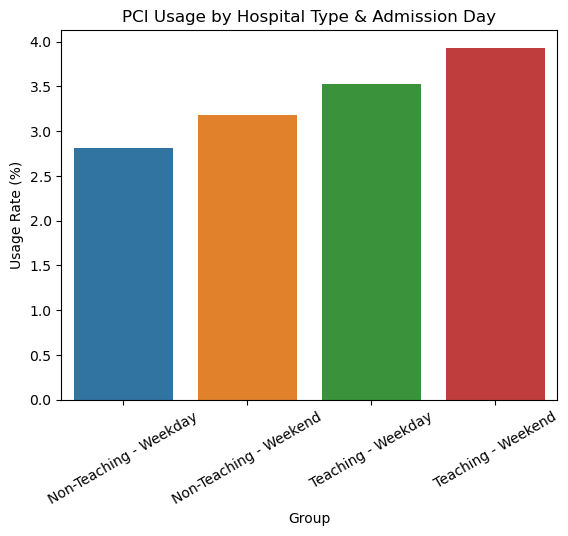

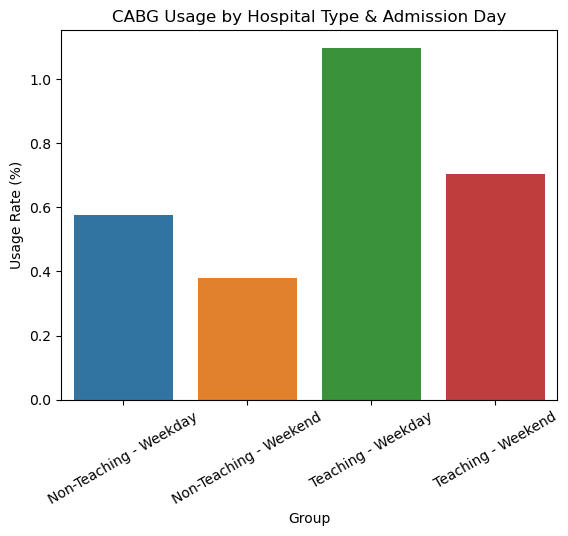

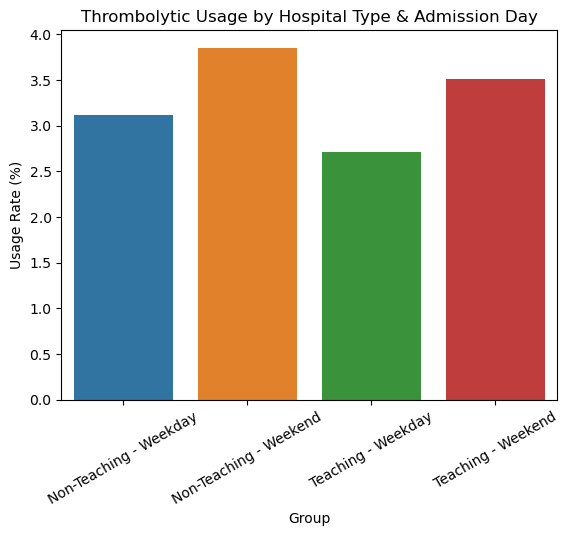

In [32]:
for proc in procedure_flags:
    temp = df.groupby(['Teaching_Hospital', 'Weekend_Admission'])[proc].mean().reset_index()
    temp[proc] = temp[proc] * 100
    temp['Group'] = temp.apply(lambda x: f"{'Teaching' if x['Teaching_Hospital'] else 'Non-Teaching'} - {'Weekend' if x['Weekend_Admission'] else 'Weekday'}", axis=1)

    sns.barplot(x='Group', y=proc, data=temp)
    plt.ylabel("Usage Rate (%)")
    plt.title(f"{proc.replace('_flag', '')} Usage by Hospital Type & Admission Day")
    plt.xticks(rotation=30)
    plt.show()


In [33]:
covariates = [
    'AGE', 'FEMALE', 'RACE', 'PAY1', 'ZIPINC_QRTL',
    'APRDRG_Severity', 'APRDRG_Risk_Mortality',
    'Hypertensive_diseases', 'Ischemic_heart_diseases', 'Pulmonary_heart_diseases',
    'HOSP_BEDSIZE', 'HOSP_REGION', 'H_CONTRL'
]

In [34]:
import statsmodels.formula.api as smf
import numpy as np

# Interaction term
df['Weekend_Teaching_Interaction'] = df['Weekend_Admission'] * df['Teaching_Hospital']

def run_usage_model(procedure_flag):
    formula = f"""{procedure_flag} ~ Weekend_Admission + Teaching_Hospital + Weekend_Teaching_Interaction + {' + '.join(covariates)}"""
    model = smf.logit(formula=formula, data=df).fit()
    
    print(f"\n=== Logistic Regression: {procedure_flag} ===")
    print(model.summary())
    print("\nOdds Ratios:")
    print(np.exp(model.params))

# Run models for each procedure
for proc in ['PCI_flag', 'CABG_flag', 'Thrombolytic_flag']:
    run_usage_model(proc)


Optimization terminated successfully.
         Current function value: 0.107327
         Iterations 12

=== Logistic Regression: PCI_flag ===
                           Logit Regression Results                           
Dep. Variable:               PCI_flag   No. Observations:              8096310
Model:                          Logit   Df Residuals:                  8096293
Method:                           MLE   Df Model:                           16
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.2736
Time:                        10:47:47   Log-Likelihood:            -8.6895e+05
converged:                       True   LL-Null:                   -1.1963e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       

In [35]:
or_summary = []

def extract_or_from_model(model, model_name):
    for var in model.params.index:
        or_summary.append({
            'Model': model_name,
            'Variable': var,
            'Odds Ratio': np.exp(model.params[var]),
            'p-value': model.pvalues[var]
        })

# Run models and collect ORs
for proc in ['PCI_flag', 'CABG_flag', 'Thrombolytic_flag']:
    formula = f"""{proc} ~ Weekend_Admission + Teaching_Hospital + Weekend_Teaching_Interaction + {' + '.join(covariates)}"""
    model = smf.logit(formula=formula, data=df).fit()
    extract_or_from_model(model, proc)

# Convert to DataFrame
import pandas as pd
or_df = pd.DataFrame(or_summary)

# Display top rows
or_df.head()


Optimization terminated successfully.
         Current function value: 0.107327
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.036925
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.112754
         Iterations 12


,Model,Variable,Odds Ratio,p-value
0,PCI_flag,Intercept,0.005054,0.000000e+00
1,PCI_flag,Weekend_Admission,1.208628,2.541555e-96
2,PCI_flag,Teaching_Hospital,1.349890,0.000000e+00
3,PCI_flag,Weekend_Teaching_Interaction,1.009445,3.823459e-01
4,PCI_flag,AGE,0.980015,0.000000e+00


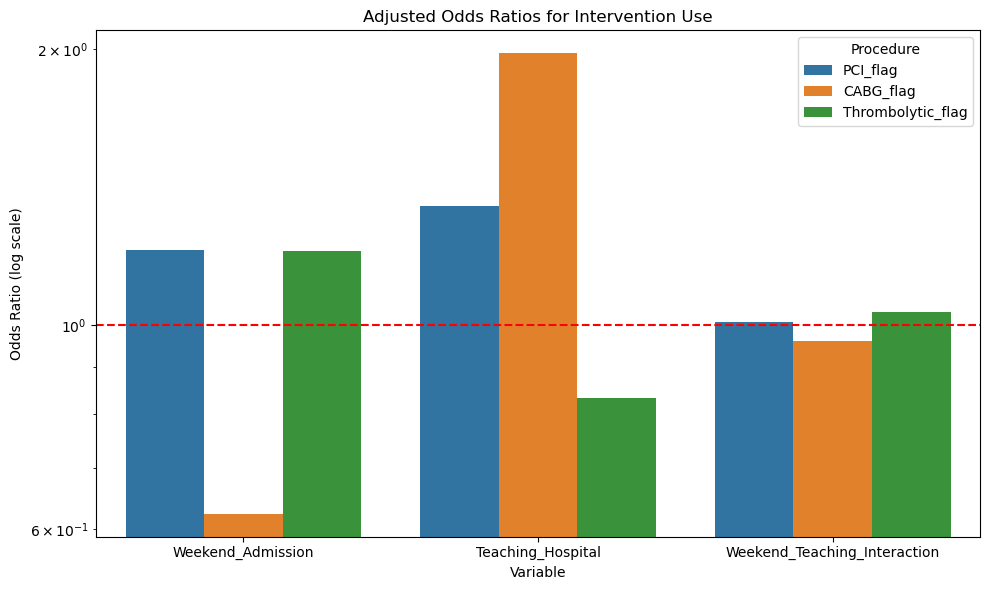

In [36]:
# Filter to key predictors
plot_df = or_df[or_df['Variable'].isin(['Weekend_Admission', 'Teaching_Hospital', 'Weekend_Teaching_Interaction'])]

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Variable', y='Odds Ratio', hue='Model')
plt.axhline(1, linestyle='--', color='red')
plt.title('Adjusted Odds Ratios for Intervention Use')
plt.ylabel('Odds Ratio (log scale)')
plt.yscale('log')
plt.legend(title='Procedure')
plt.tight_layout()
plt.show()


In [37]:
for teach_status in [0, 1]:
    subset = df[df['Teaching_Hospital'] == teach_status]
    label = "Teaching Hospital" if teach_status else "Non-Teaching Hospital"

    model = smf.logit(
        formula="DIED ~ Weekend_Admission + AGE + FEMALE + LOS + APRDRG_Severity + APRDRG_Risk_Mortality",
        data=subset
    ).fit()

    print(f"\nSubgroup Mortality Model: {label}")
    print(model.summary())


Optimization terminated successfully.
         Current function value: 0.122826
         Iterations 9

Subgroup Mortality Model: Non-Teaching Hospital
                           Logit Regression Results                           
Dep. Variable:                   DIED   No. Observations:              2585213
Model:                          Logit   Df Residuals:                  2585206
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                  0.2321
Time:                        10:52:03   Log-Likelihood:            -3.1753e+05
converged:                       True   LL-Null:                   -4.1352e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -10.7990     

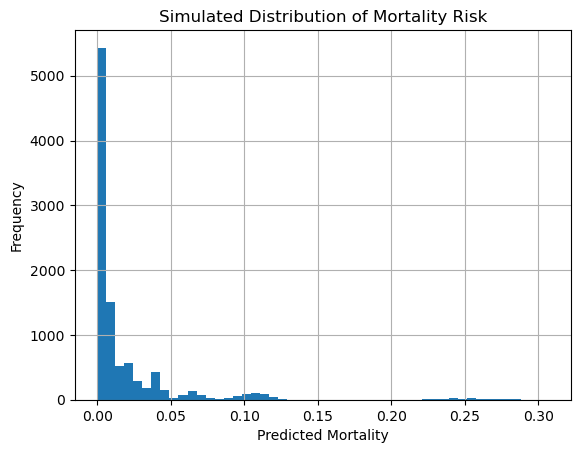

In [38]:
# Assume model already fitted as `model`
import numpy as np

n_sim = 10000

# Simulate input variables
sim_data = pd.DataFrame({
    "Weekend_Admission": np.random.choice([0, 1], size=n_sim, p=[0.78, 0.22]),
    "Teaching_Hospital": np.random.choice([0, 1], size=n_sim, p=[0.6, 0.4]),
    "AGE": np.random.normal(loc=70, scale=10, size=n_sim),
    "FEMALE": np.random.choice([0, 1], size=n_sim, p=[0.52, 0.48]),
    "LOS": np.random.poisson(5, size=n_sim),
    "APRDRG_Severity": np.random.choice([1, 2, 3, 4], size=n_sim, p=[0.1, 0.5, 0.3, 0.1]),
    "APRDRG_Risk_Mortality": np.random.choice([1, 2, 3, 4], size=n_sim, p=[0.15, 0.4, 0.3, 0.15]),
    "RACE": np.random.choice([1, 2, 3], size=n_sim),
    "PAY1": np.random.choice([1, 2, 3], size=n_sim),
})

# Add interaction
sim_data["Weekend_Teaching_Interaction"] = sim_data["Weekend_Admission"] * sim_data["Teaching_Hospital"]

# Predict mortality probabilities
sim_data["mortality_prob"] = model.predict(sim_data)

# Plot or summarize simulated mortality risk
sim_data["mortality_prob"].hist(bins=50)
plt.title("Simulated Distribution of Mortality Risk")
plt.xlabel("Predicted Mortality")
plt.ylabel("Frequency")
plt.show()

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of patients per subgroup
n = 5000

# Create base demographics and clinical characteristics
def simulate_base(n):
    return pd.DataFrame({
        "AGE": np.random.normal(loc=70, scale=10, size=n),
        "FEMALE": np.random.choice([0, 1], size=n),
        "LOS": np.random.poisson(5, size=n),
        "APRDRG_Severity": np.random.choice([1, 2, 3, 4], size=n, p=[0.1, 0.5, 0.3, 0.1]),
        "APRDRG_Risk_Mortality": np.random.choice([1, 2, 3, 4], size=n, p=[0.15, 0.4, 0.3, 0.15]),
        "RACE": np.random.choice([1, 2, 3], size=n),
        "PAY1": np.random.choice([1, 2, 3], size=n),
    })


In [40]:
# Define all 4 subgroups
def make_subgroup(weekend, teaching, label):
    df = simulate_base(n)
    df["Weekend_Admission"] = weekend
    df["Teaching_Hospital"] = teaching
    df["Weekend_Teaching_Interaction"] = weekend * teaching
    df["Group"] = label
    return df

# Generate all subgroups
g1 = make_subgroup(1, 1, "Weekend + Teaching")
g2 = make_subgroup(1, 0, "Weekend + Non-Teaching")
g3 = make_subgroup(0, 1, "Weekday + Teaching")
g4 = make_subgroup(0, 0, "Weekday + Non-Teaching")

# Combine all into one dataset
sim_all = pd.concat([g1, g2, g3, g4], ignore_index=True)


In [41]:
# Predict using your pre-trained logistic regression model
sim_all["mortality_prob"] = model.predict(sim_all)

# Summary: Average mortality by group
group_means = sim_all.groupby("Group")["mortality_prob"].agg(['mean', 'std', 'count'])
print("Average Predicted Mortality by Subgroup:\n")
print(group_means)


Average Predicted Mortality by Subgroup:

                            mean       std  count
Group                                            
Weekday + Non-Teaching  0.018706  0.038994   5000
Weekday + Teaching      0.018852  0.037852   5000
Weekend + Non-Teaching  0.019261  0.038086   5000
Weekend + Teaching      0.019049  0.038251   5000


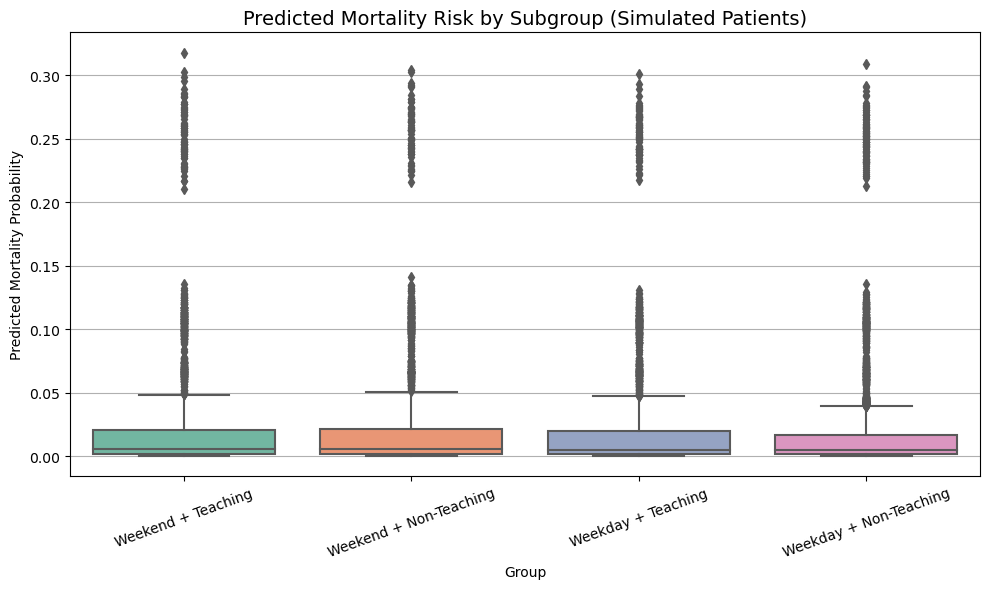

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="mortality_prob", data=sim_all, palette="Set2")
plt.title("Predicted Mortality Risk by Subgroup (Simulated Patients)", fontsize=14)
plt.ylabel("Predicted Mortality Probability")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
